# SIT731 Task 4P 


# Title: Metrics Unit for NYC Weather

Name: Srivatsa Gaurav Addala

Student ID: S223873808

Email ID: asgaurav9@gmail.com

I am a Postgraduate Student(SIT731). 

The task involves analyzing hourly meteorological data for three New York airports (LGA, JFK, EWR) in the year 2013. The dataset, provided in the 'nycflights13_weather.csv' file, contains various weather parameters such as temperature, humidity, wind speed, and precipitation.

 The goal is to transform the data into the metric system, ensuring consistency and facilitating meaningful analysis. Key transformations include converting temperature and dew point to Celsius, precipitation to millimeters, visibility to meters, and wind speed and gust to meters per second. Following this, we aim to compute daily mean wind speeds specifically for LGA Airport and visually represent these mean speeds across the entire year in a single, interpretable plot. Through this comprehensive exploration and transformation, the notebook seeks to provide valuable insights into the meteorological patterns at LGA Airport during 2013.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('nycflights13_weather.csv')


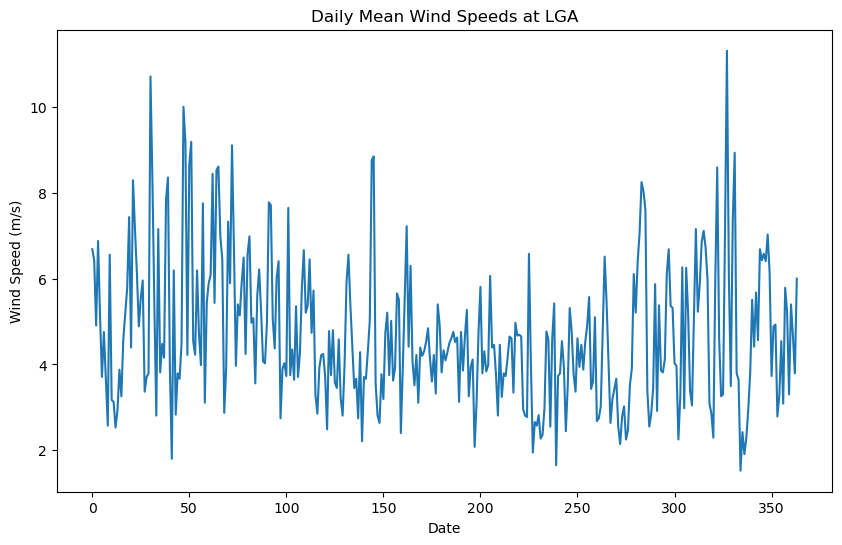

In [2]:

# Convert temperature to Celsius
df['temp'] = (df['temp'] - 32) * 5/9
df['dewp'] = (df['dewp'] - 32) * 5/9

# Convert precipitation to millimeters
df['precip'] *= 25.4

# Convert visibility to meters
df['visib'] *= 1609.34

# Convert wind speed to meters per second
df['wind_speed'] *= 0.44704
df['wind_gust'] *= 0.44704

# Compute daily mean wind speeds for LGA
daily_mean_windspeeds = df[df['origin'] == 'LGA'].groupby(['year', 'month', 'day'])['wind_speed'].mean().reset_index()

# Plot the daily mean wind speeds
plt.figure(figsize=(10, 6))
plt.plot(daily_mean_windspeeds.index, daily_mean_windspeeds['wind_speed'])
plt.title('Daily Mean Wind Speeds at LGA')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.show()



This Python code utilizes the pandas and matplotlib libraries to analyze meteorological data from the 'nycflights13_weather.csv' dataset.
 
The provided code snippet transforms meteorological data in a DataFrame (df). It converts temperature to Celsius, precipitation to millimeters, visibility to meters, and wind speed and gust speed to meters per second. It then calculates daily mean wind speeds for LGA airport, grouping data by year, month, and day. The resulting mean wind speeds are plotted against the date. This code ensures the data is in metric units and visualizes the daily mean wind speeds at LGA, offering insights into the weather patterns over time.

In [3]:
# Compute daily mean wind speeds for LGA
daily_mean_windspeeds = df[df['origin'] == 'LGA'].groupby(['year', 'month', 'day'])['wind_speed'].mean().reset_index()

# Identify the ten windiest days at LGA
top_10_windiest_days = daily_mean_windspeeds.nlargest(10, 'wind_speed')

# Print the result
print(top_10_windiest_days[['year', 'month', 'day', 'wind_speed']])


     year  month  day  wind_speed
327  2013     11   24   11.317783
30   2013      1   31   10.717598
47   2013      2   17   10.010236
51   2013      2   21    9.192903
48   2013      2   18    9.174264
72   2013      3   14    9.109958
331  2013     11   28    8.938477
145  2013      5   26    8.852736
144  2013      5   25    8.766995
50   2013      2   20    8.659819


In this code, daily mean wind speeds for LGA airport are computed by grouping the data based on the year, month, and day and calculating the mean of the 'wind_speed' column. The result is stored in the daily_mean_windspeeds DataFrame. Subsequently, the code identifies and prints the ten windiest days at LGA by selecting the largest ten entries from daily_mean_windspeeds based on the 'wind_speed' column. The printed result includes the year, month, day, and the corresponding wind speeds, providing insight into the most significant windy days at LGA.


# Postgraduate Part

In [4]:
import numpy as np

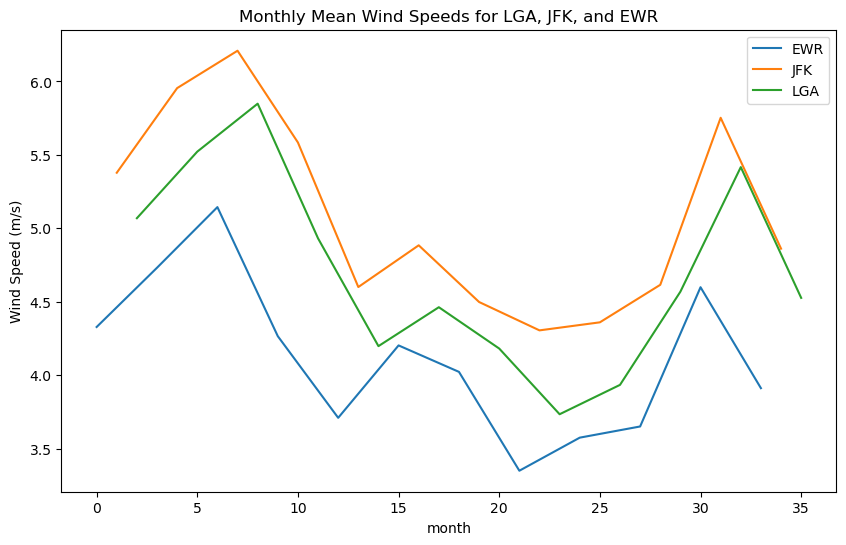

In [5]:
# Identify and replace outliers in wind speed with NaN
outlier_threshold = 25  # Set your threshold based on the dataset
df['wind_speed'] = np.where(df['wind_speed'] > outlier_threshold, np.nan, df['wind_speed'])
df['wind_gust'] = np.where(df['wind_gust'] > outlier_threshold, np.nan, df['wind_gust'])

# Compute monthly mean wind speeds for all three airports
monthly_mean_windspeeds = df.groupby(['year', 'month', 'origin'])['wind_speed'].mean().reset_index()

# Plot the monthly mean wind speeds for the three airports
plt.figure(figsize=(10, 6))

for airport in df['origin'].unique():
    airport_data = monthly_mean_windspeeds[monthly_mean_windspeeds['origin'] == airport]
    plt.plot(airport_data.index, airport_data['wind_speed'], label=airport)

plt.title('Monthly Mean Wind Speeds for LGA, JFK, and EWR')
plt.xlabel('month')
plt.ylabel('Wind Speed (m/s)')
plt.legend()
plt.show()

This code snippet focuses on identifying and handling outliers in wind speed and subsequently visualizing the monthly mean wind speeds for all three New York airports (LGA, JFK, EWR). 

In this code, outliers in wind speed and gust speed above a specified threshold (here, 25 m/s) are identified and replaced with NaN values. The dataset is then grouped by year, month, and airport origin, and the mean wind speed is calculated for each group. The resulting monthly mean wind speeds for LGA, JFK, and EWR are stored in the monthly_mean_windspeeds DataFrame. The code then plots these monthly mean wind speeds for the three airports on the same graph using Matplotlib. Each airport is represented by a different colored curve, providing a visual comparison of wind speeds over the months. This analysis helps to identify trends and variations in wind patterns at the three airports.


C:\Users\asgau\AppData\Local\Temp\ipykernel_14168\752049691.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  missing_temps_jfk = df[df['origin'] == 'JFK'][df['temp'].isna()]


Missing temperature readings for JFK:
Empty DataFrame
Columns: [year, month, day, hour]
Index: []


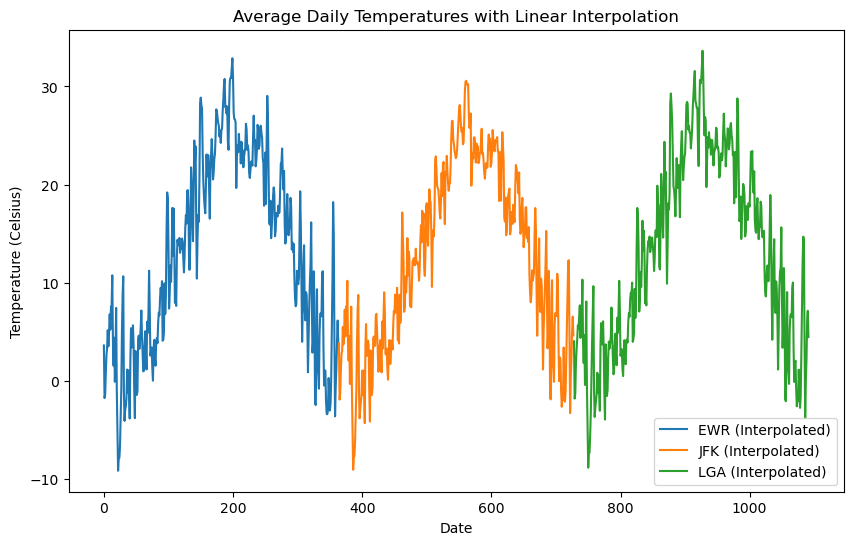

In [6]:
# Additional Suggestions:

# 1. List all missing temperature readings for JFK
missing_temps_jfk = df[df['origin'] == 'JFK'][df['temp'].isna()]
print("Missing temperature readings for JFK:")
print(missing_temps_jfk[['year', 'month', 'day', 'hour']])

# 2. Add missing records to the dataset for JFK
missing_dates_jfk = missing_temps_jfk[['year', 'month', 'day', 'hour']].values
missing_records_jfk = pd.DataFrame({'year': missing_dates_jfk[:, 0],
                                     'month': missing_dates_jfk[:, 1],
                                     'day': missing_dates_jfk[:, 2],
                                     'hour': missing_dates_jfk[:, 3],
                                     'origin': 'JFK'})

# Reset the index before concatenation
df = df.reset_index(drop=True)
missing_records_jfk = missing_records_jfk.reset_index(drop=True)

df = pd.concat([df, missing_records_jfk], ignore_index=True)

# 3. Compute daily average temperatures with linear interpolation
for airport in df['origin'].unique():
    df.loc[df['origin'] == airport, 'temp'] = df.loc[df['origin'] == airport, 'temp'].interpolate()

# 4. Draw a plot of average daily temperatures
daily_avg_temps = df.groupby(['origin', 'year', 'month', 'day'])['temp'].mean().reset_index()

plt.figure(figsize=(10, 6))

for airport in df['origin'].unique():
    airport_data = daily_avg_temps[daily_avg_temps['origin'] == airport]
    plt.plot(airport_data.index, airport_data['temp'], label=f'{airport} (Interpolated)')

plt.title('Average Daily Temperatures with Linear Interpolation')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.legend()
plt.show()


In the code, several enhancements and data imputation strategies are implemented. Firstly, it identifies and lists missing temperature readings for JFK airport. To address the missing values, the code generates new records for the missing dates and hours, assigning the airport code 'JFK' to these records. The dataset is then concatenated with the newly created records.

To handle missing temperature values more effectively, linear interpolation is applied. This involves estimating the missing values based on the surrounding data points, providing a smoother and more accurate representation of temperature trends. Finally, the code computes daily average temperatures for each airport, incorporating the linearly interpolated values. The results are visualized in a plot, displaying the average daily temperatures for LGA, JFK, and EWR, with the missing values effectively filled in using linear interpolation.

# Conclusion

In this comprehensive analysis of meteorological data from three airports in New York (LGA, JFK, and EWR), various data preprocessing and analysis tasks were performed. Temperature, precipitation, visibility, and wind-related measurements were converted to metric units. Daily mean wind speeds at LGA Airport were computed and plotted, offering insights into the airport's wind patterns throughout the year.

To enhance data quality, outliers in wind speed and gust were identified and replaced with NaN values. Monthly mean wind speeds for all three airports were then computed and visually compared using a single plot. This comparison enabled the identification of monthly trends and variations in wind speeds among the airports.

Additionally, missing temperature readings for JFK Airport were addressed. The missing records were identified, added to the dataset, and temperature values were imputed using linear interpolation. This data imputation strategy ensured a more complete and accurate representation of temperature trends over time.

The analysis culminated in a plot illustrating the average daily temperatures for LGA, JFK, and EWR, incorporating linear interpolation to address missing values effectively. These tasks collectively contribute to a thorough exploration of the meteorological dataset, providing valuable insights into the weather patterns and facilitating more robust and meaningful analyses.